# Inferential Statistic 

My note about inferential statistics from https://pythonfordatascience.org/

- Variance, Covariance, and Correlation
- Correlation tests: Pearson, Spearman rank, and Kendall Tau
- Chi-square Test of Independence
- McNemar test
- Independent T-test
- Paired Samples t-test
- Welch’s t-test
- Wilcoxon Sign-Ranked Test
- Analysis of Variance (ANOVA)
- ANOVA (2-way, N-way)
- Multiple Linear Regression
- Logistic Regression

In [99]:
# import the library
import sys
import feather
from pathlib import Path
sys.path.append(r'C:\Users\Benny\fastai\old')
import scipy
import researchpy as rp
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

%config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.imports import *
folder = 'E:/Users/Fern/data/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Variance, Covariance, and Correlation

* Variance is a measure of variability from the mean 

variance(s2) = ?(xn - x?)2/ N-1

* Covariance is a measure of relationship between the variability (the variance) of 2 variables. This measure is scale dependent because it is not standardized.

covariance(x,y)= ?(xn - x?)(yn - ?)/N-1

* Correlation/Correlation coefficient (r value) is a measure of relationship between the variability (the variance) of 2 variables. This measure is standardized and is not scale dependent.

r(x,y)= ?(xn - x?)(yn - ?)/((N-1)SDxSDy

There are not set standards for what is considered a weak or strong correlation. It’s usually field dependent, but a guideline is below.

r value Strength

0.0 – 0.2	= Weak correlation

0.3 – 0.6	= Moderate correlation

0.7 – 1.0	= Strong correlation

There are other equations to calculate correlation coefficients, such as Spearman’s rank (a.k.a. Spearman’s correlation), Kendall’s tau, biserial, and point-biseral correlations.

In [4]:
# Setting a seed so the example is reproducible 
np.random.seed(4272018)

df = pd.DataFrame(np.random.randint(low= 0, high= 20, size= (5, 2)), 
                  columns= ['Commercials Watched', 'Product Purchases'])

df

,Commercials Watched,Product Purchases
0,10,13
1,15,0
2,7,7
3,2,4
4,16,11


In [5]:
# calculate variance
df['Commercials Watched'].var()

33.5

In [7]:
#calculate covariance matrix  
df[['Commercials Watched', 'Product Purchases']].cov()

,Commercials Watched,Product Purchases
Commercials Watched,33.50,3.25
Product Purchases,3.25,27.50


In [9]:
# calculate correlation matrix

df[['Commercials Watched', 'Product Purchases']].corr()

,Commercials Watched,Product Purchases
Commercials Watched,1.000000,0.107077
Product Purchases,0.107077,1.000000


# Correlation Tests

H0 hypothesis: There is not a relationship between variable 1 and variable 2

HA hypothesis: There is a relationship between variable 1 and variable 2

If the obtained p-value is less than what it is being tested at, then one can state that there is a significant relationship between the variables. Most fields use an alpha level of 0.05.


## Assumptions

## Pearson correlation assumptions

Pearson correlation test is a parametric test. In order for the results of a Pearson correlation test to be valid, the data must meet these assumptions:

- The sample is independently and randomly drawn
- A linear relationship between the two variables is present
- When plotted, the lines form a line and is not curved
- There is homogeneity of variance

The variables being used in the correlation test should be continuous and measured either on a ratio or interval sale, each variable must have equal number of non-missing observations, and there should be no outliers present.

## Spearman Rank correlation assumptions
The Spearman rank correlation is a non-parametric test that does not make any assumptions about the distribution of the data. The assumption for the Spearman rank correlation test is:

- There is a monotonic relationship between the variables being tested
- A monotonic relationship exists when one variable increases so does the other

For the Spearman rank correlation, the data can be used on ranked data, if the data is not normally distributed, and even if the there is not homogeneity of variance.

## Kendall’s Tau correlation assumptions
The Kendall’s Tau correlation is a non-parametric test that does not make any assumptions about the distribution of the data. The only assumption is:

- There should be a monotonic relationship between the variables being tested

The data should be measured on either an ordinal, ratio, or interval scale.

In [121]:
df = pd.read_csv(folder+'diamonds.csv')

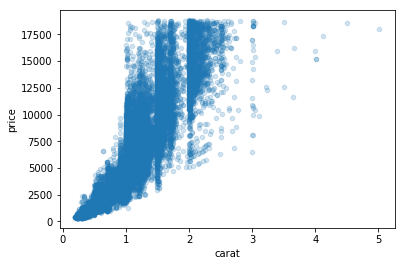

In [122]:
df.plot.scatter("carat", "price",alpha=0.2)

In statistics, a sequence or a vector of random variables is homoscedastic /ˌhoʊmoʊskəˈdæstɪk/ if all random variables in the sequence or vector have the same finite variance. 

To formally test homogeneity of variances,use the Levene’s test of homogeneity of variances which is the stats.levene() method from scipy.stats. https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html

In [16]:
stats.levene(df['carat'], df['price'])

LeveneResult(statistic=40965.26627380512, pvalue=0.0)

Levene’s test for equal variances is significant, meaning we violate the assumption of homoscedasticity. Given that, the appropriate correlation test to use would be a non-parametric test such as the Spearman rank correlation or Kendall Tau correlation test. 

In [17]:
# pearson correlation 
df['carat'].corr(df['price'])

0.921591301193476

In [18]:
df['carat'].corr(df['price'], method= 'spearman')

0.9628827988813001

Both methods show a strong level of correlation between the carat of the diamond and the price of the diamond. 

To conduct the Pearson correlation test using scipy.stats, use the .pearsonr() method. This method also return r-value and p-value

In [19]:
stats.pearsonr(df['carat'], df['price'])

(0.9215913011934768, 0.0)

The Pearson correlation indicates there is a statistically significant strong relationship between the price and carat of a diamond. 

In [22]:
stats.spearmanr(df['carat'], df['price'])

SpearmanrResult(correlation=0.9628827988813001, pvalue=0.0)

In [23]:
stats.kendalltau(df['carat'], df['price'])

KendalltauResult(correlation=0.8341049107108127, pvalue=0.0)

The Spearman rank and kendal Tau correlation method indicate that the correlation is strong and significant between the size of the carat and the price of the diamond.

## Correlation using researchpy

The pandas built-in correlation methods are able to conduct pairwise correlation measures on multiple variables at a time and will return the results in a correlation matrix. However, this method does not produce p-values that are associated with each measure of correlation. The scipy.stats correlation measures are only able to conduct measures of correlation on pairs of variables at a time.

Using researchpy which has the benefits of being able to run measures of correlation on pairs or multiple pairs of variables, calculates the p-value, and if running correlation on multiple pairs, you can decide if you want to use pairwise or casewise deletion methods.

The casewise method returns all information in 3 dataframes.
the pairwise method returns the information in a single dataframe

In [26]:
#casewise method
corr_type, corr_matrix, corr_ps = rp.corr_case(df[['carat', 'price', 'depth']])

print(corr_type)
print(corr_matrix)
print(corr_ps)

  Pearson correlation test using list-wise deletion
0                   Total observations used = 53940
        carat   price   depth
carat       1  0.9216  0.0282
price  0.9216       1 -0.0106
depth  0.0282 -0.0106       1
        carat   price   depth
carat  0.0000  0.0000  0.0000
price  0.0000  0.0000  0.0134
depth  0.0000  0.0134  0.0000


In [27]:
#pairwise method 
rp.corr_pair(df[['carat', 'price', 'depth']])


,r value,p-value,N
carat & price,0.9216,0.0000,53940
carat & depth,0.0282,0.0000,53940
price & depth,-0.0106,0.0134,53940


# Chi-square Test of Independence

The Chi-square test of independence tests if there is a relationship between two categorical variables. The data is usually displayed in a cross-tabulation format with each row representing a level (group) for one variable and each column representing a level (group) for another variable. The test is comparing the observed observations to the expected observations.

The Chi-square test of independence is an omnibus test; meaning it tests the data as a whole. This means that one will not be able to easily tell which levels (categories) of the variables are responsible for the relationship if the Chi-square table is larger than 2×2. If the test is larger than 2×2, it requires post hoc testing.

The H0 (Null Hypothesis): There is no relationship between variable one and variable two.

The H1 (Alternative Hypothesis): There is a relationship between variable 1 and variable 2.

If the p-value is significant, you can reject the null hypothesis and claim that the findings support the alternative hypothesis.

## Assumptions
The following assumptions need to be meet in order for the results of the Chi-square test to be trusted.

- When testing the data, the cells should be counts of cases and not percentages. It is okay to convert to percentages after testing the data
- The levels (groups) of the variables being tested are mutually exclusive
- Each participant contributes to only one cell within the Chi-square table
- The groups being tested must be independent
- The value of expected cells should be greater than 5 for at least 20% of the cells
If all of these assumptions are met, then Chi-square is the correct test to use.

In [28]:
df = pd.read_csv(folder+'mental-heath-in-tech-2016_20161114.csv')
df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


We will test if there is an association between willingness to discuss a mental health issues with a direct supervisor and currently having a mental health disorder. 

In [29]:
rp.summary_cat(df[['Do you currently have a mental health disorder?', 'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?' ]])

,Variable,Outcome,Count,Percent
0,Do you currently have a mental health disorder?,Yes,575,40.13
1,,No,531,37.06
2,,Maybe,327,22.82
3,Would you have been willing to discuss a menta...,Some of my previous employers,654,51.74
4,,"No, at none of my previous employers",416,32.91
5,,I don't know,101,7.99
6,,"Yes, at all of my previous employers",93,7.36


For the variable “Do you currently have a mental health disorder?”, we are going to drop the responses of “Maybe” since we are only interested in if people know they do or do not have a mental health disorder. 

In [30]:
def drop_maybe(series):
    if series.lower() == 'yes' or series.lower() == 'no':
        return series
    else:
        return

In [31]:
df['current_mental_disorder'] = df['Do you currently have a mental health disorder?'].apply(drop_maybe)
df['willing_discuss_mh_supervisor'] = df['Would you have been willing to discuss a mental health issue with your direct supervisor(s)?']
    
rp.summary_cat(df[['current_mental_disorder', 'willing_discuss_mh_supervisor']])

,Variable,Outcome,Count,Percent
0,current_mental_disorder,Yes,575,51.99
1,,No,531,48.01
2,willing_discuss_mh_supervisor,Some of my previous employers,654,51.74
3,,"No, at none of my previous employers",416,32.91
4,,I don't know,101,7.99
5,,"Yes, at all of my previous employers",93,7.36


In [32]:
#take a look at the crosstab frequencies of the two groups.
pd.crosstab(df['willing_discuss_mh_supervisor'], df['current_mental_disorder'])

current_mental_disorder,No,Yes
willing_discuss_mh_supervisor,,
I don't know,51,29
"No, at none of my previous employers",119,194
Some of my previous employers,237,267
"Yes, at all of my previous employers",51,24


## Use Scipy for Chi2 test

The chi2_contingency() method conducts the Chi-square test on a contingency table (crosstab). 

In [34]:
crosstab = pd.crosstab(df['willing_discuss_mh_supervisor'], df['current_mental_disorder'])
stats.chi2_contingency(crosstab)


(32.408194625396376, 4.292859793048239e-07, 3, array([[ 37.69547,  42.30453],
        [147.48354, 165.51646],
        [237.48148, 266.51852],
        [ 35.33951,  39.66049]]))

While we check the results of the chi2 test, we need also to check that the expected cell frequencies are greater than or equal to 5; this is one of the assumptions (as mentioned above) for the chi2 test. If a cell has an expected frequency less that 5, then the Fisher’s Exact test should be use to overcome this problem.

The first value (32.408) is the Chi-square value, followed by the p-value (4.29e-07), then comes the degrees of freedom (3), and lastly it outputs the expected frequencies as an array. Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05.


Thus, the results indicate that there is a relationship between willingness to discuss a mental health issues with a direct supervisor and currently having a mental health disorder within the tech/IT workplace.

Although our Chi-square test was signficant, since our analysis is 2×3 we can’t yet state exactly where the relationship is since the Chi-square test is an omnibus test (Omnibus test as a general name refers to an overall or a global test.) We have to conduct post hoc tests to test where the relationship is between the different levels (categories) of each variable. We have to conduct post hoc tests to test where the relationship is between the different levels (categories) of each variable. 

## Chi-square Test of Independence using Researchpy

In [35]:
table, results = rp.crosstab(df['willing_discuss_mh_supervisor'], df['current_mental_disorder'], prop= 'col', test= 'chi-square')
    
table

current_mental_disorder                
                                                          No     Yes     All
willing_discuss_mh_supervisor                                               
I don't know                                           11.14    5.64    8.23
No, at none of my previous employers                   25.98   37.74   32.20
Some of my previous employers                          51.75   51.95   51.85
Yes, at all of my previous employers                   11.14    4.67    7.72
All                                                   100.00  100.00  100.00

In [36]:
results

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,32.4082
1,p-value =,0.0000
2,Cramer's V =,0.1826


In the results table, researchpy’s crosstab method also returned Cramer’s V which is an effect size measure. This tells how strong the relationship between the two variables are.

There is a statistically significant relationship between having a current mental health disorder and the willingness to discuss mental health with supervisor, ?2(3)= 32.4082, p < 0.0001. The strength of that relationship is small, Cramer's V= 0.1826


## Chi-square Test of Independence Post Hoc Testing

Now that we know our Chi-square test of independence is significant, we want to test where the relationship is between the levels of the variables. In order to do this, we need to conduct multiple 2×2 Chi-square tests using the Bonferroni-adjusted p-value.

Some of you may ask why? By comparing multiple levels (categories) against each other, the error rate of a false positive compounds with each test. Meaning, our first test at the level 0.05 is a 5% chance of a false positive; the test after that would be 10% chance of a false positive, and so forth. With each subsequent test, one would be increasing the error rate by 5%. If we were to conduct all of the possible 6 pairwise comparisons, our last 2×2 Chi-square test would have an error rate of 30%! Meaning our p-value being tested at would equal 0.30, which is not acceptable on any level.

To avoid this, the Bonferroni-adjusted method adjusts the p-value by how many planned pairwise comparisons are being conducted. The formula is p/N, where “p”= the original tests p-value and “N”= the number of planned pairwise comparisons.
In our example, if we were planning on conducting all possible pairwise comparisons then the formula would be 0.05/6 = 0.008. Meaning, a post hoc 2×2 Chi-square test would have to have a p-value less than 0.008 to be significant. However, we are not interested in the “I don’t know” category of the “willing_discuss_mh_supervisor” variable. Thus making the formula be 0.05/3, which equals 0.017. So for our planned pairwise comparisons to be significant, the p-value must be less than 0.017.

To conduct multiple 2×2 Chi-square tests, one needs to regroup the variables for each test to where it is one category against the rest. For us, it will be:

- No, at none of my previous employers vs. the rest
- Some of my previous employers vs, the rest
- Yes, at all of my previous employers vs. the rest

Python makes this task easy! There is a pd.get_dummies() method which creates dummy variables where each new variable is only one category of the original variable and is equal to “1” if they belong in that category and “0” if they do not. We will assign the dummy variables to a new Python data frame.

In [37]:
dummies = pd.get_dummies(df['willing_discuss_mh_supervisor'])
dummies.drop(["I don't know"], axis= 1, inplace= True)
dummies.head()

,"No, at none of my previous employers",Some of my previous employers,"Yes, at all of my previous employers"
0,0,1,0
1,0,1,0
2,0,0,0
3,0,1,0
4,0,1,0


In [38]:
for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[f"{series}"], df['current_mental_disorder'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

current_mental_disorder                No  Yes
No, at none of my previous employers          
0                                     412  381
1                                     119  194 

Chi2 value= 16.906443844118506
p-value= 3.926805158610076e-05
Degrees of freedom= 1

current_mental_disorder         No  Yes
Some of my previous employers          
0                              294  308
1                              237  267 

Chi2 value= 0.2924156694554503
p-value= 0.5886766550070441
Degrees of freedom= 1

current_mental_disorder                No  Yes
Yes, at all of my previous employers          
0                                     480  551
1                                      51   24 

Chi2 value= 12.034595567813462
p-value= 0.0005222216393205276
Degrees of freedom= 1



Using the Bonferroni-adjusted p-value of 0.017, 2 of the 3 planned pairwise comparisons are significant. There is a significant relationship between current_mental_disorder & No, at none of my previous employers, and current_mental_disorder & Yes, at all of my previous employers. Now we can compare the cells within the Chi-square test table.

Looking at current_mental_disorder & No, at none of my previous employers, it can be stated that a higher proportion of individuals with a current mental illness reported they would not have been willing to discuss a mental health issue with their direct supervisor.
Looking at current_mental_disorder & Yes, at all of my previous employers, it can be stated that a lower proportion of those with a current mental illness reported they would have been willing to discuss a mental health issue with their direct supervisor.

Another example of Chi-square test.

does an interest in math or science depend on gender, or are they independent?
https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

In [52]:
data = np.array([['Male',         10,      20,    30],
['Female',       6,      9,    17]])
df = pd.DataFrame(data)
df.set_index(0,inplace=True)
df.columns = ['Science','Math','Art']
# look at the contingency table.
df

,Science,Math,Art
0,,,
Male,10,20,30
Female,6,9,17


In [50]:
df.values

array([['10', '20', '30'],
       ['6', '9', '17']], dtype=object)

In [54]:
from scipy.stats import chi2
stat, p, dof, expected = stats.chi2_contingency(df.values.astype(int))
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=2
[[10.43478 18.91304 30.65217]
 [ 5.56522 10.08696 16.34783]]
probability=0.950, critical=5.991, stat=0.272
Independent (fail to reject H0)
significance=0.050, p=0.873
Independent (fail to reject H0)


## Chi-Squared Goodness-Of-Fit Test

The chi-squared goodness-of-fit test is an analog of the one-way t-test for categorical variables: it tests whether the distribution of sample categorical data matches an expected distribution. For example, you could use a chi-squared goodness-of-fit test to check whether the race demographics of members at your church or school match that of the entire U.S. population or whether the computer browser preferences of your friends match those of Internet uses as a whole.
When working with categorical data, the values themselves aren't of much use for statistical testing because categories like "male", "female," and "other" have no mathematical meaning. Tests dealing with categorical variables are based on variable counts instead of the actual value of the variables themselves.
Let's generate some fake demographic data for U.S. and Minnesota and walk through the chi-square goodness of fit test to check whether they are different:

In [55]:
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)
           

minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
                         ["black"]*250 +["asian"]*75 + ["other"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")

print( "National")
print(national_table)
print(" ")
print( "Minnesota")
print(minnesota_table)

National
col_0      count
0               
asian      15000
black      50000
hispanic   60000
other      35000
white     100000
 
Minnesota
col_0     count
0              
asian        75
black       250
hispanic    300
other       150
white       600


Chi-squared tests are based on the so-called chi-squared statistic. You calculate the chi-squared statistic with the following formula:

sum((observed−expected)2expected)

In the formula, observed is the actual observed count for each category and expected is the expected count based on the distribution of the population for the corresponding category. Let's calculate the chi-squared statistic for our data to illustrate:

In [56]:
observed = minnesota_table

national_ratios = national_table/len(national)  # Get population ratios

expected = national_ratios * len(minnesota)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

col_0
count    18.194805
dtype: float64


In [57]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 4)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=4)
print("P value")
print(p_value)

Critical value
9.487729036781154
P value
[0.00113]


Since our chi-squared statistic exceeds the critical value, we'd reject the null hypothesis that the two distributions are the same. 

In [58]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts


Power_divergenceResult(statistic=array([18.19481]), pvalue=array([0.00113]))

# McNemar test


The McNemar test can be thought of as a repeated measures, or paired sample, version of a chi-square test of independence. It is used to test for a change in proportion between two time points.

Please note that from here on out, “0” indicates a non-event or non-case while “1” indicates event or case, i.e. “0” indicates no disease while “1” indicates disease.

Hypothesis being tested:

- Ho: Probability of Time_1 (0, 1) = Time_2 (0, 1)
  - Referencing the table below, Time_1 (0, 1) = b and Time_2 (0, 1) = c
- Ha: Probability of Time_1 (0, 1) ? Time_2 (0, 1)

Let’s clarify this a bit more with a table. What the null hypothesis is stating is that there is no difference in the proportion of individuals in cell b and cell c; while the alternative hypothesis is stating that there is a difference.

McNemar tests can only be used for a 2×2 table.

After Treatment 

| <i></i>| <i></i>|Healthy (0)|Disease (1)|
| -- | -- | ---- | ---------|
| Before Treatment	| Healthy (0)	|a|	b|
|   <i></i>       | Disease (1)	|c|	d|

## Assumptions
There are three main assumptions:

- Two categorical variables (before & after) each with 2 groups that are mutually exclusive
- The group pairs are mutually independent
i.e. Before Treatment (Healthy) and After Treatment (Healthy) are assigned group status independently of the other, another way to say this is that the participant can be assigned to one group and not the other. This applies to every group pair.
- Sample must be random

In this example data, I will be looking to see if the intervention decreased the percentage of individuals that had fair/poor health. Meaning that the hypothesis being tested is that the intervention had a significant effect at decreasing the number of people that reported fair/poor health.

In [125]:
df = pd.read_csv(folder+'fairpoor.csv')
df.head()

,id,fairpoor_t1,fairpoor_t2
0,1,0,1
1,2,0,0
2,3,0,0
3,4,1,1
4,5,1,0


In [60]:
rp.summary_cat(df[['fairpoor_t1', 'fairpoor_t2']])

,Variable,Outcome,Count,Percent
0,fairpoor_t1,0,133,66.5
1,,1,67,33.5
2,fairpoor_t2,0,143,71.5
3,,1,57,28.5


33.5% individuals reported fair/poor health at time 1 and 28.5% individuals reported fair/poor health at time 2. Is this a significant decrease in the percentage of individuals that reported fair/poor health? 

In [62]:
table, res = rp.crosstab(df['fairpoor_t1'], df['fairpoor_t2'], test= 'mcnemar')

table

fairpoor_t2         
                      0   1  All
fairpoor_t1                     
0                    92  41  133
1                    51  16   67
All                 143  57  200

In [63]:
res

,McNemar,results
0,McNemar's Chi-square ( 1.0) =,1.0870
1,p-value =,0.2971
2,Cramer's phi =,0.0737


Two hundred participants were recruited to take part in an intervention designed to educate them about the benefits of exercise and reducing their overall BMI. McNemar’s test was used to test for a significant difference in proportions, the difference in the proportions between the pre- and post-intervention was not statistically significant, p = n.s. This would suggested that the intervention is not effective.

# Independent T-test

The independent t-test is also called the two sample t-test, student’s t-test, or unpaired t-test. It’s an univariate test that tests for a significant difference between the mean of two independent (unrelated) groups.

The hypothesis being tested is:

**Null hypothesis (H0)**: u1 = u2, which translates to the mean of sample 1 is equal to the mean of sample 2

**Alternative hypothesis (HA)**: u1 ? u2, which translates to the mean of sample 1 is not equal to the mean of sample 2

To determine if there is a significant difference between two groups one must set a p-value before hand; if the test produces a p-value which is less than the set p-value then the test is said to be significant and that there is a significant difference between the two means. This means one rejects the null hypothesis in support of the alternative. Most commonly the p-value is set to 0.05.

## Assumptions 

- The samples are independently and randomly drawn
- The distribution of the residuals between the two groups should follow the normal distribution
- The variances between the two groups are equal

If any of these assumptions are violated then another test should be used. The dependent variable (outcome being measured) should be continuous which is measured on an interval or ratio scale.

In [64]:
df = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master//Iris_Data.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [65]:
# Showing descriptive statistics from pandas.describe()
df.groupby("species")['sepal_width'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


In [66]:
# Showing descriptive statistics from researchpy.summary_cont()
rp.summary_cont(df.groupby("species")['sepal_width'])

,N,Mean,SD,SE,95% Conf.,Interval
species,,,,,,
Iris-setosa,50,3.418,0.381024,0.053885,3.311313,3.524687
Iris-versicolor,50,2.770,0.313798,0.044378,2.682136,2.857864
Iris-virginica,50,2.974,0.322497,0.045608,2.883701,3.064299


There is a difference between the average sepal width between the setosa and versicolor species, the standard deviations are small for both groups, and the 95% confidence intervals do not overlap so there should be a significant difference between these two – but, let’s not get ahead.

In [67]:
setosa = df[(df['species'] == 'Iris-setosa')]
setosa.reset_index(inplace= True)

versicolor = df[(df['species'] == 'Iris-versicolor')]
versicolor.reset_index(inplace= True)

## Assumption Check

- Homogeneity of variances
- Normal distribution of residuals
Checking for normality can be done visually or with a formula test. Visually, one can use a p-p plot (probability plot), a q-q plot, or histogram, and/or one can use the Shapiro-Wilk test to formally test for normality. To test for normality formally, use stats.shaprio() which is from the scipy.stats library.

In [68]:
# Homogeneity of variances
stats.levene(setosa['sepal_width'], versicolor['sepal_width'])

LeveneResult(statistic=0.6635459332943233, pvalue=0.4172859681296204)

The test is not significant meaning there is homogeneity of variances and we can use the t-test. If the test were to be significant, a viable alternative would be to conduct a Welch’s t-test.

Text(0.5, 0, 'Length (cm)')

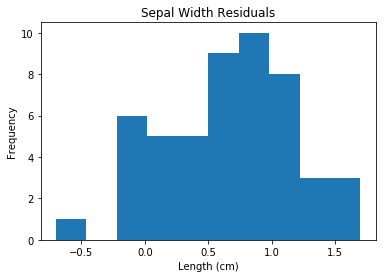

In [70]:
# Normal distribution of residuals
diff = setosa['sepal_width'] - versicolor['sepal_width']

# check visually 
diff.plot(kind= "hist", title= "Sepal Width Residuals")
plt.xlabel("Length (cm)")

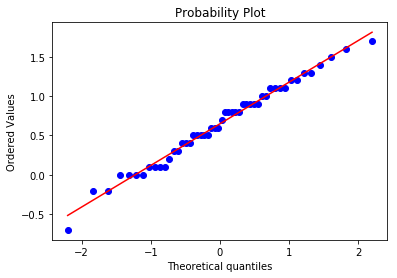

In [73]:
res = stats.probplot(diff, plot=plt)

If the dots are not on the red line then it’s an indication that there is deviation from normality. Some deviations from normality is fine, as long as it’s not severe.

The p-p plot shows that the data maintains normality.

In [74]:
# formal test on normality.
stats.shapiro(diff)

(0.9859335422515869, 0.8108891248703003)

The first value is the W test statistic and the second value is the p-value. Since the test statistic does not produce a significant p-value, the data is indicated to be normally distributed.

In [75]:
stats.ttest_ind(setosa['sepal_width'], versicolor['sepal_width'])

Ttest_indResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15)

Using reserachpy

In [76]:
descriptives, results = rp.ttest(setosa['sepal_width'], versicolor['sepal_width'])

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,sepal_width,50.0,3.418,0.381024,0.053885,3.309714,3.526286
1,sepal_width,50.0,2.770,0.313798,0.044378,2.680820,2.859180
2,combined,100.0,3.094,0.476057,0.047606,2.999540,3.188460


In [77]:
results

,Independent t-test,results
0,Difference (sepal_width - sepal_width) =,0.6480
1,Degrees of freedom =,98.0000
2,t =,9.2828
3,Two side test p value =,0.0000
4,Mean of sepal_width > mean of sepal_width p va...,1.0000
5,Mean of sepal_width < mean of sepal_width p va...,0.0000
6,Cohen's d =,1.8566
7,Hedge's g =,1.8423
8,Glass's delta =,1.7007
9,r =,0.6840


The results are the same using both methods, there is a significant difference in the sepal length between the floral species setosa and versicolor. Using researchpy, we also get one-sided p-values, the degrees of freedom, and a few effect size measures.

**Summary** 

The purpose of the current study was to test if there is a significant difference in the sepal width between the floral species Iris-setosa and Iris-versicolor. Iris-setosa’s average sepal width (M= 3.418, SD= 0.381) is wider and has slightly larger variation than Iris-versicolor (M= 2.770, SD= 0.314). An independent t-test was used to test for a difference. There is a statistically significant difference between the sepal width of Iris-setosa and Iris-versicolor (t(98)= 9.282, p< 0.0001, r= 0.6840).

# Paired Samples t-test

The paired sample t-test is also called dependent sample t-test. It’s an univariate test that tests for a significant difference between 2 related variables. An example of this is if you where to collect the blood pressure for an individual before and after some treatment, condition, or time point.

The hypothesis being test is:

**Null hypothesis (H0)**: ud = 0, which translates to the mean difference between sample 1 and sample 2 is equal to 0.

**Alternative hypothesis (HA)**: ud ? 0, which translates to the mean difference between sample 1 and sample 2 is not equal to 0.
If the p-value is less than what is tested at, most commonly 0.05, one can reject the null hypothesis.

## Paired Sample t-test Assumptions
In order for the paired sample t-test results to be trusted, the following assumptions need to be met:

- The dependent variable (DV) must be continuous which is measured on an interval or ratio scale
- The DV should be approximately normally distributed
    - Testing for normality needs to be conducted on the differences between the two conditions, not the raw values of each condition itself
    - The paired sample t-test is robust to this violation. If there is a violation of normality, as long as it’s not in a major violation the test results can be considered valid
- The DV should not contain any significant outliers

If any of these assumptions are violated, a different test should be used. An alternative to the paired sample t-test is the Wilcoxon signed-rank Test.

In [79]:
df = pd.read_csv(folder+'blood_pressure.csv')
df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


In [85]:
df.head()

,patient,sex,agegrp,bp_before,bp_after,bp_difference
0,1,Male,30-45,143,153,-10
1,2,Male,30-45,163,170,-7
2,3,Male,30-45,153,168,-15
3,4,Male,30-45,153,142,11
4,5,Male,30-45,146,141,5


## Checking the Assumptions 

- Assumption Check: Outliers
- Assumption Check: Normal Distribution

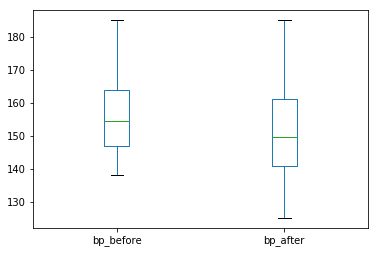

In [80]:
# First let’s check for any significant outliers in each of the variables.
df[['bp_before', 'bp_after']].plot(kind='box')

 doesn’t appear to be any significant outliers in the variables.

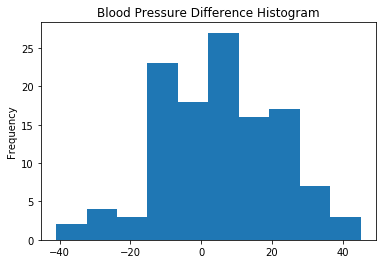

In [81]:
#Assumption Check: Normal Distribution
df['bp_difference'] = df['bp_before'] - df['bp_after']

df['bp_difference'].plot(kind='hist', title= 'Blood Pressure Difference Histogram')

Text(0.5, 1.0, 'Blood pressure Difference Q-Q Plot')

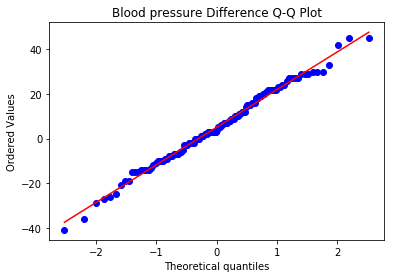

In [82]:
# Q-Q plot
stats.probplot(df['bp_difference'], plot= plt)
plt.title('Blood pressure Difference Q-Q Plot')

In [83]:
stats.shapiro(df['bp_difference'])

(0.9926842451095581, 0.7841846942901611)

The test was non-significant. Therefore, the difference between the two conditions is normally distributed. 

To conduct the paired sample t-test, one needs to use the stats.ttest_rel() method.

In [84]:
stats.ttest_rel(df['bp_before'], df['bp_after'])

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

The findings are statistically significant! 

A paired sample t-test was used to analyze the blood pressure before and after the intervention to test if the intervention had a significant affect on the blood pressure. The blood pressure before the intervention was higher (156.45 ± 11.39 units) compared to the blood pressure post intervention (151.36 ± 14.18 units); there was a statistically significant decrease in blood pressure (t(119)=3.34, p= 0.0011) of 5.09 units.

# Welch’s t-test 

Welch’s t-test is a nonparametric univariate test that tests for a significant difference between the mean of two unrelated groups. It is an alternative to the independent t-test when there is a violation in the assumption of equality of variances.

The hypothesis being tested is:

Null hypothesis (H0): u1 = u2, which translates to the mean of sample 1 is equal to the mean of sample 2
Alternative hypothesis (HA): u1 ? u2, which translates to the mean of sample 1 is not equal to the mean of sample 2
If the p-value is less than what is tested at, most commonly 0.05, one can reject the null hypothesis.

## Welch’s t-test Assumptions
Like every test, this inferential statistic test has assumptions. The assumptions that the data must meet in order for the test results to be valid are:

- The independent variable (IV) is categorical with at least two levels (groups)
- The dependent variable (DV) is continuous which is measured on an interval or ratio scale
- The distribution of the two groups should follow the normal distribution

If any of these assumptions are violated then another test should be used. 
We will look at Iris datasets

In [87]:
df = pd.read_csv(folder+'Iris_Data.csv')
df.groupby("species")['petal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


In [88]:
setosa = df[(df['species'] == 'Iris-setosa')]
virginica = df[(df['species'] == 'Iris-virginica')]

In [89]:
# test the assumption of normality using the stats.shapiro()
stats.shapiro(setosa['petal_length'])

(0.9549458622932434, 0.05464918911457062)

In [90]:
stats.shapiro(virginica['petal_length'])

(0.9621862769126892, 0.10977369546890259)

Neither of the variables of interest violates the assumption of normality.

To conduct a Welch’s t-test, one needs to use the stats.ttest_ind() method while passing “False” in the “equal_var=” argument.

In [91]:
stats.ttest_ind(setosa['petal_length'], virginica['petal_length'], equal_var = False)

Ttest_indResult(statistic=-49.965703359355636, pvalue=9.713867061697096e-50)

The p-value is significant, therefore one can reject the null hypothesis in support of the alternative.

In [93]:
def welch_dof(x,y):
    '''
    calculates the degree of freedom as a two tail test and returns it
    '''
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    print(f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")
        
welch_dof(setosa['petal_length'], virginica['petal_length'])

Welch-Satterthwaite Degrees of Freedom= 58.5928


In [94]:
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")

welch_ttest(setosa['petal_length'], virginica['petal_length'])


 Welch's t-test= -49.9657 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom= 58.5928


The current study aimed to test if there was a significant difference in the petal length between the floral species Setosa and Virginica. Setosa has shorter petal length (M= 1.464 units, SD= 0.174 units) compared to Virginica (M= 5.552 units, SD= 0.552 units). Welch’s t-test was selected to analyze the data because Levene’s test for homogeneity of variances indicated unequal variances between groups (F= 39.977, p< 0.0001). The difference in petal length between the two species is significantly different (Welch’s t(-49.966)= 58.593, p< 0.0001).

# Wilcoxon Sign-Ranked Test

The Wilcoxon signed-rank test is the non-parametric univariate test which is an alternative to the dependent t-test. It also is called the Wilcoxon T test, most commonly so when the statistic value is reported as a T value. Which scipy.stats.wilcoxon() uses for it’s calculation. This is the recommended test to use when the data violates the assumption of normality. It’s used to test if there is a significant difference on scores when there is a “before” and “after” condition of some treatment or intervention. An example of this is if you where to collect the blood pressure for an individual before and after some treatment, condition, or time point.

The hypothesis being test is:

Null hypothesis (H0): The difference between the pairs follows a symmetric distribution around zero.
Alternative hypothesis (HA): The difference between the pairs does not follow a symmetric distribution around zero.
If the p-value is less than what is tested at, most commonly 0.05, one can reject the null hypothesis.

## Wilcoxon signed-rank test Assumptions
In order for the Wilcoxon signed-rank test results to be trusted, the following assumptions need to be met:

- The dependent variable (DV) must be continuous which is measured on an ordinal or continuous scale
- The paired observations are randomly and independently drawn
- The paired observations come from the same population

If any of these assumptions are violated, a different test should be used.



In [95]:
df = pd.read_csv(folder+'blood_pressure.csv')
df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


This test has no assumptions about the distribution of the data so there is nothing to check in that regard. This test works similarly to dependent t-test, in that the test is based on the differences between the two conditions that are being paired.

There are two ways to go about this using the scipy.stats.wilcoxon() method. The first is to calculate the differences between the two conditions and pass that through the method, and the second is much simpler where one enters the two conditions and let’s Python take care of everything. This page will show both.

Going the first way of calculating the difference between the two conditions. If there is a difference of 0, these scores need to be excluded from the ranking. Let’s calculate this and see if there are any differences that are equal to 0.

In [96]:
df['bp_difference'] = df['bp_before'] - df['bp_after']
df['bp_difference'][df['bp_difference']==0]

41     0
74     0
103    0
115    0
Name: bp_difference, dtype: int64

Since there are differences of 0, these scores need to be excluded from the ranking process. Although this is an easy process to do using Python, the test method itself will automatically exclude any 0 difference from the calculation so there is nothing more that needs to be done. The data is now ready.

To conduct the test, one needs to use the stats.wilcoxon method. The first example code will show how to use the method using a variable that contains the difference between the conditions, and the second example code will show how to use the method using both variables.

In [97]:
stats.wilcoxon(df['bp_difference'])

WilcoxonResult(statistic=2234.5, pvalue=0.0014107333565442858)

In [98]:
stats.wilcoxon(df['bp_before'], df['bp_after'])

WilcoxonResult(statistic=2234.5, pvalue=0.0014107333565442858)

The findings are statistically significant! One can reject the null hypothesis in support of the alternative.

A Wilcoxon T test was used to analyze the blood pressure before and after the intervention to test if the intervention had a significant affect on the blood pressure. The blood pressure before the intervention was higher (M= 156.45 ± 11.39 units) compared to the blood pressure post intervention (M= 151.36 ± 14.18 units); there was a statistically significant decrease in blood pressure (t=2,234.5, p= 0.0014).

# Analysis of Variance (ANOVA) (One-Way)

The analysis of variance (ANOVA) can be thought of as an extension to the t-test. The independent t-test is used to compare the means of a condition between 2 groups. ANOVA is used when one wants to compare the means of a condition between 2+ groups. ANOVA is an omnibus test, meaning it tests the data as a whole. Another way to say that is this, ANOVA tests if there is a difference in the mean somewhere in the model (testing if there was an overall effect), but it does not tell one where the difference is if the there is one. To find out where the difference is between the groups, one has to conduct post-hoc tests. 

Although it can be thought of as an extension of the t-test, in terms of when to use it, mathematically speaking, it’s more of a regression model and is considered a generalized linear model (GLM). The general regression equation is as follow:

outcome$_i$ = (model) + error$_i$

Replacing the general regression equation with fake groups to show context would make the equation look like this:

outcomei = b0 + b1Group1 + b2Group1 + errori

Where:

b0 is the model’s intercept (a.k.a. the constant term),
b1Group1 is the the coefficient (b1) and the respective group value (Group1), and
errori is the error present in the model

The testing hypothesis of an ANOVA is as follows:

H0: No difference between means, i.e. ?x1 = ?x2 = ?x3
Ha: Difference between means exist somewhere, i.e. ?x1 ? ?x2 ? ?x3, or ?x1 = ?x2 ? ?x3, or ?x1 ? ?x2 = ?x3

## ANOVA Assumptions
There are 3 assumptions that need to be met for the results of an ANOVA test to be considered accurate and trust worthy. It’s important to note the the assumptions apply to the residuals and not the variables themselves. The ANOVA assumptions are the same as for linear regression and are:

- Normality
    - Caveat to this is, if group sizes are equal, the F-statistic is robust to violations of normality
- Homogeneity of variance
    - Same caveat as above, if group sizes are equal, the F-statistic is robust to this violation
- Independent observations

If possible, it is best to have groups the same size so corrections to the data do not need to be made. However, with real world data, that is often not the case and one will have to make corrections to the data. If these assumptions are not met, and one does not want to transform the data, an alternative test that could be used is the Kruskal-Wallis H-test or Welch’s ANOVA.

In [128]:
df = pd.read_csv(folder+'difficile.csv')
df

,person,dose,libido
0,1,1,3
1,2,1,2
2,3,1,1
3,4,1,1
4,5,1,4
5,6,2,5
6,7,2,2
7,8,2,4
8,9,2,2
9,10,2,3


In [101]:
df.drop('person', axis= 1, inplace= True)

# Recoding value from numeric to string
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)
    
# Gettin summary statistics
rp.summary_cont(df['libido'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,libido,15.0,3.466667,1.76743,0.456349,2.487896,4.445437


In [102]:
rp.summary_cont(df['libido'].groupby(df['dose']))

,N,Mean,SD,SE,95% Conf.,Interval
dose,,,,,,
high,5,5.0,1.581139,0.707107,3.450484,6.549516
low,5,3.2,1.303840,0.583095,1.922236,4.477764
placebo,5,2.2,1.303840,0.583095,0.922236,3.477764


## ANOVA with scipy.stats 

stats.f_oneway(data_group1, data_group2, data_group3, data_groupN)

In [103]:
stats.f_oneway(df['libido'][df['dose'] == 'high'], 
             df['libido'][df['dose'] == 'low'],
             df['libido'][df['dose'] == 'placebo'])

F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

The F-statistic= 5.119 and the p-value= 0.025 which is indicating that there is an overall significant effect of medication on libido. However, we don’t know where the difference between dosing/groups is yet. This is in the post-hoc section. A thing to note, is that if you are doing this for academic research purposes, this method is missing some of the information that is required for publication. For example, one would need the degrees of freedom, have to calculate the sum of squares, and conduct post-hoc tests by hand. 

##  ANOVA with statsmodels

Using statsmodels, we get a bit more information and enter the model as a regression formula. The general input using this method looks like this:

model_name = ols('outcome_variable ~ group1 + group2 + groupN', data=your_data).fit()

If you dummy code the groups, you have to not include 1 of the groups in the formula. This group’s data will still get captured in the model’s intercept and is the base (control) group. If you use the following method of entering the formula Python takes care of this for you.

model_name = ols('outcome_variable ~ C(group_variable)', data=your_data).fit()

In [104]:
results = ols('libido ~ C(dose)', data=df).fit()
results.summary()

C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 libido   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.119
Date:                Wed, 15 May 2019   Prob (F-statistic):             0.0247
Time:                        17:14:46   Log-Likelihood:                -24.683
No. Observations:                  15   AIC:                             55.37
Df Residuals:                      12   BIC:                             57.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.0000      0.627      7.972      0.000       3.634       6.366
C(dose)[T.low]        -1.8000      0.887     -2.029      0.065      -3.732       0.132
C(dose)[T.placebo]    -2.8000      0.887     -3.157      0.008      -4.732      -0.868
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.108
Skew:                           0.195   Prob(JB):                        0.575
Kurtosis:                       1.727   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This method provides more information and is overall more useful. Like mentioned earlier, the intercept group is the high dose group since the high dose group’s data was not included in the model’s formula. Their data is still captured because this group has values of 0 in both of the other groups.

Something to note, at the bottom of the table there are a few tests that were conducted to test the models’s assumptions. This will be discussed later and shown how to call these diagnostics without printing out the model in the regression format.

Let’s interpret the table. Overall the model is significiant, F(2,12)= 5.12, p = 0.0247. This tells us that there is a significant difference in the group means. The coefficients (coef in the table), are the difference in mean between the control group and the respective group listed. The intercept is the mean for the high dose group, placebo group’s coefficient = 2.2 – 5.0 = -2.8, and low dose coefficient = 3.2 – 5.0 = -1.8. Looking at the p-values now (P>|t| in the table), we can see the difference between the high dose group and placebo group is significant, p = 0.008, but the difference between the low dose group and high dose group is not, p = 0.065. There is no comparison between the low dose group and the placebo group. I wanted to show you this to see where these numbers come from. Coming from the ANOVA framework, the information we are really after in this table it the F-statistic and it’s corresponding p-value. This tells us if we explained a significant amount of the overall variance. To test between groups, we need to do some post-hoc testing where we can compare all groups against each other. We are still missing some useful information with this method, we need an ANOVA table.

In [105]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(dose),20.133333,2.0,5.118644,0.024694
Residual,23.600000,12.0,NaN,NaN


Let’s break down this ANOVA table. The dose row is the between groups effect which is the overall experimental effect. The sum of squares for the model (SSM; value 20.133 in the table) is how much variance is explained by our model. The current model explains a significant amount of variance, F(2,12)= 5.12, p < 0.05. The residual row is the unsystematic variation in the data (SSR; also called the unexplained variance; value 23.600 in the table). In this case, the unsystematic variation represents the natural individual differences in libido and natural different reactions to the drug, Difficile.

## CALCULATING MODEL EFFECT SIZE

Something that is useful is the effect size. The effect size tells us how much of an impact the experiment will have in the real world. There are a few different effect sizes one can use: eta squared (?2), and omega squared (?2). Omega squared is considered a better measure of effect size than eta squared because it is unbiased in it’s calculation.

Something to note, for some reason R2 is called eta squared within the ANOVA framework. They are the same thing. R2 is a measure of how much variance is explained by the model and is calculated by taking the explained variance (SSM) and dividing it by the total variance (SST; also called total sum of squares). With the total variance (SST) equaling the sum of squares for the model (SSM) plus the sum of square for the residual (SSR). Thus making the equation for R2 and eta squared:

R2 and eta squared = SSM/SST
R2 and eta squared = 20.133/43.733 = 0.460

That means the current model accounts for 46.0% of the variance in contributing to libido. Like just mentioned, within the ANOVA framework, R2 is also called eta squared, and can be interpreted as the amount of explained variance, as well as an effect size measure.

Another thing we need to calculate is the mean squares. The mean squares is desired because it eliminates the bias present in the SSM and SSR, and it is also used to calculate the F-statistic and omega squared. SSM and SSR are biased because they are influenced by the number of values summed to calculated them. To calculate the mean squares, one divides the sum of squares (SSM and SSR) by the degrees of freedom respectively.

MSM= SSM/dfM = 20.135/2 = 10.067
MSR= SSR/dfR = 23.60/12 = 1.967

MSM is the average amount of variance explained by the current model, MSR is the average amount of variance unexplained by the current model. The ratio of MSM to MSR is used to calculate the F-statistic. We don’t need to do this since we already have it, but it’s nice to understand where the numbers come from!

MSM/MSR = 10.067/1.967 = 5.118

The following function calculates the effect sizes mentioned, as well as the mean squares and updates the table!

In [106]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(dose),20.133333,2.0,10.066667,5.118644,0.024694,0.460366,0.354486
Residual,23.600000,12.0,1.966667,NaN,NaN,NaN,NaN


## Assumption Checks/Model Diagnostics

As mentioned earlier, when working with linear regression and ANOVA models, the assumptions pertain to the residuals and not the variables themselves. Using Statsmodels, we can use the diagnostics that is already provided. The default output is not pretty, so often times I like to print the model summary as a regression table and look there than use the following code as it’s more readable in the regression table.

In [107]:
results.diagn

{'jb': 1.1080275776425255,
 'jbpv': 0.574638696944554,
 'skew': 0.19458085550134002,
 'kurtosis': 1.726659006032749,
 'omni': 2.517358660775963,
 'omnipv': 0.2840288872319991,
 'condno': 3.7320508075688767,
 'mineigval': 1.3397459621556138}

These are the same diagnostics from the bottom of the regression table from before. The Durban-Watson tests is to detect the presence of autocorrelation (not provided when calling diagnostics this way), Jarque-Bera (jb; jbpv is p-value) tests the assumption of normality, Omnibus (omni; omnipv is p-value) tests the assumption of homogeneity of variance, and the Condition Number (condno) assess multicollinearity. Condition Number values over 20 are indicative of multicollinearity.

If the omnibus test were to be significant, an option on how to handle it would be to use a heteroscedasticity corrected coefficient covariance matrix in the .anova_lm() method. 

## Other ways to check assumptions
Here are some other ways to test the assumptions of the ANOVA model. I tend to use these methods when conducting an ANOVA.

Assumption: Homogeneity of Variance
One can use the Levene’s test to test for equal variances between groups. This is apart of the scipy.stats library

In [108]:
stats.levene(df['libido'][df['dose'] == 'placebo'],
             df['libido'][df['dose'] == 'low'],
             df['libido'][df['dose'] == 'high'])

LeveneResult(statistic=0.11764705882352934, pvalue=0.8900225182757423)

the groups have equal variances.

In [109]:
stats.shapiro(results.resid)

(0.9166916012763977, 0.17146942019462585)

 the residuals are normally distributed.

## Post-hoc Testing


The overall model was significant, now to test which groups differ. Deciding which groups to compare should be theory driven. There are a few different techniques that can be used. Each of these techniques have different ways of controlling for familywise error rate. 3 common methods are:

- Fisher’s Least Significant Difference (LSD): Take the groups you want to compare and conduct multiple t-tests. This method requires that the ANOVA model be significant. This method is easy, but receives push back since it doesn’t account for familywise error rate. The argument is that since the overall model was significant, one is protected from increasing the familywise error rate.
- Bonferroni correction: Take the alpha the ANOVA was tested at, 0.05, then divide it by the number of planned comparisons. In this case, 0.05/3 = 0.0167. A post-hoc test would have to have an alpha level < 0.0167 to be considered significant. To test the groups, conduct multiple t-tests, but set the alpha value to the corrected value. This method is quick, but often considered too conservative.
- Tukey’s HSD: Method also controls for familywise error rate with a different method than Bonferroni, and is also considered conservative.

There are many other techniques out there that can be used for post-hoc testing each with different guidelines for when they should be used, you are encouraged to learn about them!

### TUKEY’S HSD POST-HOC COMPARISON

In [110]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['libido'], df['dose'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1  group2 meandiff  lower   upper  reject
----------------------------------------------
 high    low     -1.8   -4.1651  0.5651 False 
 high  placebo   -2.8   -5.1651 -0.4349  True 
 low   placebo   -1.0   -3.3651  1.3651 False 
----------------------------------------------


The Tukey HSD post-hoc comparison test controls for type I error and maintains the familywise error rate at 0.05 (FWER= 0.05 top of the table). The group1 and group2 columns are the groups being compared, the meandiff column is the difference in means of the two groups being calculated as group2 – group1, the lower/upper columns are the lower/upper boundaries of the 95% confidence interval, and the reject column states whether or not the null hypothesis should be rejected. Unfortunately, this method currently does not provide the t-statistic so treatment effect size cannot be calculated.

### BONFERRONI CORRECTION POST-HOC COMPARISON

First the corrected p-value needs to be calculated. This can be done using the formula:

p-value/# of comparisons = 0.05/3 = 0.01667

Now the t-tests that are conducted have to have a p-value less than 0.01667 in order to be considered significant.

In [111]:
stats.ttest_ind(df['libido'][df['dose'] == 'high'], df['libido'][df['dose'] == 'low'])

Ttest_indResult(statistic=1.963961012123931, pvalue=0.08513507177899203)

In [112]:
stats.ttest_ind(df['libido'][df['dose'] == 'low'], df['libido'][df['dose'] == 'placebo'])

Ttest_indResult(statistic=1.2126781251816647, pvalue=0.2598450452137845)

In [113]:
stats.ttest_ind(df['libido'][df['dose'] == 'high'], df['libido'][df['dose'] == 'placebo'])

Ttest_indResult(statistic=3.0550504633038926, pvalue=0.015700141250047695)

Using the Bonferroni correction, only the difference between the high dose and placebo groups are significantly different. We can calculate the high dosing’s effect size! To calculate the effect size for the treatment dosing we also need to calculate the degrees of freedom since it’s not provided. The following equations can be used:

dof = #_observations_group1 + #_observations_group2 - #_of_groups
dof = 5 + 5 - 2 = 8

effect size r = square root of (t2/t2 + dof)

effect size r = sqrt(1.213**2/(1.213**2 + 8)) = 0.39

The high dose has a medium effect size.

**ANOVA Results Interpretation**

While interpreting the ANOVA results, the Bonferroni post-hoc analysis results will be used.

There was a significant effect of Difficile on the level of libido, F(2,12)= 5.12, p < 0.05, ?2 = 0.35. Planned post-hoc testing, using the Bonferroni correction ?= 0.0167, revealed that high dose of Difficile significantly increased libido compared to the placebo, t(8)=3.06, p < 0.0167, r= 0.39. There were no other statistically significant differences between groups.

# Analysis of Variance (ANOVA)

Introduction to two-way ANOVA and expansion to an N-way ANOVA
Let’s start with when to use a two-way ANOVA, and how it differs from a one-way ANOVA. Hopefully you already know when to use a one-way ANOVA, if not, a one-way ANOVA should be used if you have 1 categorical independent variable (IV) with 3+ categories or groups, and 1 continuous dependent variable (DV); this is a 1 factor design. A quick digression, if a one-way ANOVA is conducted when the IV has 2 groups, there will be the same finding as conducting a two-sample independent t-test.

The two-way ANOVA is an extension to the one-way ANOVA and should be used if you have 2 categorical IVs with 2+ groups, and 1 continuous DV; this is a multi-factor design, specifically a 2 factor design. It’s a 2 factor design, because there are 2 IVs. In the ANOVA framework, IVs are often called factors and each category/group within an IV is called a level. Just as with a one-way ANOVA, a two-way ANOVA tests if there is a difference between the means, but it does not tell which groups differ. To get this information, one has to conduct post-hoc testing.

The logic that I am about to explain can be used to expand from a two-way ANOVA to an N-way ANOVA where N is any number of factors. As a warning, it’s about to get complex so take the time to understand everything.

To talk us through this, imagine a study where there are 2 IVs that each have 2 levels (groups/categories) and a continuous DV (outcome). We have independent variable A with 2 levels (A1 and A2), independent variable B with 2 levels (B1 and B2) and our DV which is most commonly annotated as Y. We want to see the effects of A on Y, B on Y, and to test if there is an interaction effect of A and B on Y. With this design, the following hypotheses are being tested:

- Factor A x Factor B interactions:
     - H0 : there is not interaction
     - Ha : there is an interaction
- Main effect of factor A:
    - H0 : ?1 = ?2
    - Ha : Not all of the means (?) are equal
- Main effect of factor B:
    - H0 : ?1 = ?2
    - Ha : Not all of the means (?) are equal
    
With a multi-factor model, the significance of the interaction should be tested as the first step. If the interaction is significant, the sole main effects of factor A or factor B are not really interpretable by themselves since the significant interaction indicates that the effect of factor A depends on the level of factor A and the the level of factor B, and vise versa. If the interaction effect between factor A and factor B is not significant, then you remove the interaction from the model and test for significant main effects by themselves.

Expansion to N-way ANOVA
This model can be expanded to any number of factors. For each factor that is in the model, an interaction effect should be tested.

A 3-way ANOVA example; a study is testing the effects of the type of fertilizer, the amount of water, and the amount of sun on the mean crop yield. One should test the main interaction which includes all factors (fertilizer*water*sun), each sub-interaction (fertilizer*water, fertilizer*sun, water*sun), and the main effects. With this design, the following hypotheses are being tested:

- fertilizer * water * sun interactions:
    - H0 : there is not interaction
    - Ha : there is an interaction
- fertilizer * water interactions:
    - H0 : there is not interaction
    - Ha : there is an interaction
- fertilizer * sun interactions:
    - H0 : there is not interaction
    - Ha : there is an interaction
- water * sun interactions:
    - H0 : there is not interaction
    - Ha : there is an interaction
- Main effect of fertilizer:
    - H0 : ?1 = ?2
    - Ha : Not all of the means (?) are equal
- Main effect of water:
    - H0 : ?1 = ?2
    - Ha : Not all of the means (?) are equal
- Main effect of sun:
    - H0 : ?1 = ?2
    - Ha : Not all of the means (?) are equal
    
If the main interaction (fertilizer * water * sun) is significant, the other interactions do not matter as much because the significant main interaction is indicating the the effects of each factor depends on the levels of each other factor. To find out which combinations of the levels are different from other combinations would require post-hoc testing. If the main interaction is not significant, you remove it from the model and re-run it looking at the lower-level interactions, and so fourth.

This 3-way ANOVA should highlight how complex the designs can get very quickly. Hopefully this logic is clear and you can apply it to any number of factors in your N-way model.

In [129]:
df = pd.read_csv(folder+'crop_yield.csv')
df.head()

,Fert,Water,Yield
0,A,High,27.4
1,A,High,33.6
2,A,High,29.8
3,A,High,35.2
4,A,High,33.0


In [130]:
rp.summary_cont(df['Yield'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Yield,20.0,29.04,4.230516,0.945972,27.060058,31.019942


In [131]:
rp.summary_cont(df.groupby(['Fert']))['Yield']


,N,Mean,SD,SE,95% Conf.,Interval
Fert,,,,,,
A,10,30.90,3.283968,1.038482,28.864576,32.935424
B,10,27.18,4.394390,1.389628,24.456329,29.903671


In [132]:
rp.summary_cont(df.groupby(['Water']))['Yield']

,N,Mean,SD,SE,95% Conf.,Interval
Water,,,,,,
High,10,30.82,3.244756,1.026082,28.808879,32.831121
Low,10,27.26,4.495974,1.421752,24.473367,30.046633


In [133]:
rp.summary_cont(df.groupby(['Fert', 'Water']))['Yield']

N   Mean        SD        SE  95% Conf.   Interval
Fert Water                                                    
A    High   5  31.80  3.146427  1.407125  29.042036  34.557964
     Low    5  30.00  3.512834  1.570987  26.920866  33.079134
B    High   5  29.84  3.374611  1.509172  26.882023  32.797977
     Low    5  24.52  3.791042  1.695406  21.197005  27.842995

## 2-way ANOVA Example

You could calculate the ANOVA by hand, but that’s unnecessary because statsmodels has good support already. In this example, I will use Type II sum of squares. There are 3 types of sum of squares that should be considered when conducting an ANOVA, by default Python and R uses Type I, whereas SAS tends to use Type III. The differences in the types of sum of squares is out of this page’s scope; but you should research the differences to decide which type you should use for your study.

In [135]:
# Fits the model with the interaction term
# This will also automatically include the main effects for each factor
    
model = ols('Yield ~ C(Fert)*C(Water)', df).fit()

    # Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 3, 16) =  4.112, p =  0.0243


Excellent, the overall model is significant. Now we need to check the assumptions of the ANOVA, normality and homogeneity of variance. Statsmodels already provides model diagnostics in the model summary table. The summary table is also going to output information that we don’t necessarily care about coming from the ANOVA framework so we can ignore this and just look at the diagnostic information at the bottom of the table.

In [136]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     4.112
Date:                Wed, 15 May 2019   Prob (F-statistic):             0.0243
Time:                        17:30:32   Log-Likelihood:                -50.996
No. Observations:                  20   AIC:                             110.0
Df Residuals:                      16   BIC:                             114.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       31.8000      1.549     20.527      0.000      28.516      35.084
C(Fert)[T.B]                    -1.9600      2.191     -0.895      0.384      -6.604       2.684
C(Water)[T.Low]                 -1.8000      2.191     -0.822      0.423      -6.444       2.844
C(Fert)[T.B]:C(Water)[T.Low]    -3.5200      3.098     -1.136      0.273     -10.088       3.048
==============================================================================
Omnibus:                        3.427   Durbin-Watson:                   2.963
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                1.319
Skew:                          -0.082   Prob(JB):                        0.517
Kurtosis:                       1.752   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Durban-Watson tests is to detect the presence of autocorrelation, Jarque-Bera tests the assumption of normality, Omnibus tests the assumption of homogeneity of variance, and the Condition Number assess multicollinearity. Condition Number values over 20 are indicative of multicollinearity. The model passes the assumption check, which is excellent. Now let’s take a look at the ANOVA table.

In [137]:
# Creates the ANOVA table
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.766000,0.028847
C(Water),63.368,1.0,5.280667,0.035386
C(Fert):C(Water),15.488,1.0,1.290667,0.272656
Residual,192.000,16.0,NaN,NaN


The interaction term is not significant. This indicates that there is no interaction effect between the type of fertilizer and the amount of water on the mean crop yield. Since this is not significant, the interaction term is to be removed from the model and it needs to be re-ran so we can look at the main effects of each factor independently.

In [138]:
# Fits the model
model2 = ols('Yield ~ C(Fert)+ C(Water)', df).fit()

print(f"Overall model F({model2.df_model: .0f},{model2.df_resid: .0f}) = {model2.fvalue: .3f}, p = {model2.f_pvalue: .4f}")

Overall model F( 2, 17) =  5.430, p =  0.0150


Excellent, the model is still significant. Again, let’s look at the model’s summary table to check the assumptions.

In [139]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     5.430
Date:                Wed, 15 May 2019   Prob (F-statistic):             0.0150
Time:                        17:31:15   Log-Likelihood:                -51.772
No. Observations:                  20   AIC:                             109.5
Df Residuals:                      17   BIC:                             112.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          32.6800      1.353     24.153      0.000      29.825      35.535
C(Fert)[T.B]       -3.7200      1.562     -2.381      0.029      -7.016      -0.424
C(Water)[T.Low]    -3.5600      1.562     -2.279      0.036      -6.856      -0.264
==============================================================================
Omnibus:                        1.169   Durbin-Watson:                   2.736
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                0.820
Skew:                          -0.081   Prob(JB):                        0.664
Kurtosis:                       2.022   Cond. No.                         3.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Just as with before, the model without the interaction term passes the assumption check. Now let’s look at this model’s ANOVA table.

In [140]:
# Creates the ANOVA table
res2 = sm.stats.anova_lm(model2, typ= 2)
res2

,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.669070,0.029228
C(Water),63.368,1.0,5.191895,0.035887
Residual,207.488,17.0,NaN,NaN


Each factor has an independent significant effect on the mean crop yield. While it’s good to know if there is a statistically significant effect of some intervention on the outcome, it’s as important to know the size of the effect the intervention has on the outcome. Statistical significance does not always translate into a large effect in the world. This is important to consider because everything cost money and time. To see this, we can calculate the effect size. The following code uses the ANOVA table produced by statsmodels and appends the effect size measures of eta-squared (?2) and omega-squared (?2)

In [141]:
# Calculating effect size
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(res2)

,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
C(Fert),69.192,69.192000,1.0,5.669070,0.029228,0.203477,0.161778
C(Water),63.368,63.368000,1.0,5.191895,0.035887,0.186350,0.145244
Residual,207.488,12.205176,17.0,NaN,NaN,NaN,NaN


?2 is a better measure of effect size since it’s unbiased in it’s calculation. It takes into account the degrees of freedom, whereas ?2 does not. Side note, ?2 and R2 are the same thing in the ANOVA framework. Each factor, fertilizer and water, has a small effect on the mean crop yield.

Knowing that using fertilizer or using water has a statistical significant effect on the mean crop yield should lead you to ask the following question, “is there a difference between the type of fertilizer, and is there a difference in the amount of water used?” We can answer this question with post-hoc testing.

## Post-hoc Testing

There are a few different methods of post-hoc testing to find a difference between groups of factors. I will show how to use Tukey’s HSD. We have to test for difference for each factor separately.

In [143]:
import statsmodels

In [144]:
mc = statsmodels.stats.multicomp.MultiComparison(df['Yield'], df['Fert'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  A      B     -3.72   -7.3647 -0.0753  True 
---------------------------------------------


There is a statistically significant different between the mean crop yield between fertilizer A and B; fertilizer A yields a significantly higher crop yield than fertilizer B.

In [145]:
mc = statsmodels.stats.multicomp.MultiComparison(df['Yield'], df['Water'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 High   Low    -3.56   -7.2436 0.1236 False 
--------------------------------------------


# Linear Regression 

Introduction to Multiple Linear Regression
Linear regression models are used to analyze the relationship between an independent variable (IV) or variables and a dependent variable (DV), a.k.a the predicted variable. If only one predictor variable (IV) is used in the model, then that is called a single linear regression model. However, the model will not be robust in design and will have little to no explanation power because in the real world there is no 1 variable that can fully explain, or predict, an outcome. Most commonly, the model will have multiple IVs which will make it a multiple linear regression model. Lets take a look at the equation formula for multiple linear regression:

Y = ?0 + ?1X1 + ?2X2 + ?nXn + ei

Where:

- Y = outcome variable (dependent variable)
- ?0 = constant coefficient (Y-intercept)
-?1X1 = is the coefficient and known constant for variable 1, respectively
- ?2X2 = is the coefficient and known constant for variable 2, respectively
- ?nXn = is the coefficient and known constant for variable n, respectively
- ei = error
For every variable in the regression model, the model will add a ?nXn term in the model. The “n” will notate the number of the IV. Okay, that’s enough of a primer for now. Don’t worry is this doesn’t make much sense to you now. The model will be filled in later with numbers from the example data which will make the picture more cohesive.

Multiple linear regression has assumptions just like all other parametric approaches. It is often time not possible to test the assumptions before running the model. Therefor, model diagnostics should be ran after fitting the model to test the following 
## assumptions:

- Data must not have multicollinearity
- The residual errors should be approximately normally distributed
- Homoscedasticity
- Independence of errors

Often times when using real world data, there will be violations. If the residuals violate the assumptions of homoscedasticity and/or normality, then you can try transforming the data or using a robust regression model (discussed below). If no transformations or corrections are made to the data/model, then one will have difficulties generalizing the model to the population, i.e. the findings should be limited to the sample used.

This data set contains information on insurance premium charges, age, sex, BMI, number of children, smoker status, and region. The question being asked is, what are the most influential predictors of insurance premium charges? This makes the DV be the insurance premium charge and the IVs are the other variables in the data.

In [149]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip

In [157]:
df = pd.read_csv(folder+'insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [154]:
rp.summary_cont(df[['charges','age', 'children']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,charges,1338.0,13270.422265,12110.011237,331.067454,12620.954034,13919.890496
1,age,1338.0,39.207025,14.049960,0.384102,38.453516,39.960534
2,children,1338.0,1.094918,1.205493,0.032956,1.030266,1.159569


There is a lot of variability in the variables charges, and a decent amount in age. Something to keep an eye on. 

let’s get some descriptives on the categorical variables.

In [152]:
rp.summary_cat(df[['sex', 'smoker', 'region']])

,Variable,Outcome,Count,Percent
0,sex,male,676,50.52
1,,female,662,49.48
2,smoker,no,1064,79.52
3,,yes,274,20.48
4,region,southeast,364,27.20
5,,northwest,325,24.29
6,,southwest,325,24.29
7,,northeast,324,24.22


The sample is a near even split of males and females, majority are non-smokers, and there is a very close breakdown in region. I could run the the regression model using the variables as is, however I want to run a correlation matrix to look for multicollinearity between variables. In order to do this I have to recreate dummy variables of the categorical data. I will show two methods of how to do this.

The first is to use the .replace() method that is built-in to Pandas DataFrame.
Since the region variable has multiple categories within it, an easy way to create multiple dummy variables is to use Pandas’s built-in .get_dummies() method.

When using dummy variables, it is important to not include 1 of the dummy variables per original categorical variable. For example, since region had 4 possible categories, I will include 3 of those 4 in the model and the 4th category will still be captured in the model’s intercept.

In [158]:
df['sex'].replace({'female' : 1, 'male' : 0}, inplace= True)
df['smoker'].replace({'no': 0, 'yes': 1}, inplace= True)
df = pd.get_dummies(df)
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


## Multiple Linear Regression Example

fit a model using statsmodels formula 

In [159]:
model = smf.ols("charges ~ age + bmi + sex + smoker + children + region_northwest + region_southeast + region_southwest", data= df).fit()
    
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 15 May 2019   Prob (F-statistic):               0.00
Time:                        18:18:16   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.207e+04    999.649    -12.074      0.000    -1.4e+04   -1.01e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
sex                131.3144    332.945      0.394      0.693    -521.842     784.470
smoker            2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
children           475.5005    137.804      3.451      0.001     205.163     745.838
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         315.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model explains a significant amount of variance which is indicated by the F-statistic value and it’s correponding p-value, F(8, 1329)= 500.8, p< 0.01. 

Now to run diagnostics on the model. Statsmodels already provides some model diagnostics which are the omnibus test (measuring amount of explained variance), Durbin-Watson test (measuring a relationship between values separated by a time lag), Jarque-Bera test (test of normality), and the Condition Number (measure of multicollinearity).

## Diagnosing Multicollinearity

In [160]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292,0.002425,0.011156,-0.017117,0.004184
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,-0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


## Diagnosing Normality

For regressions, the test of normality applies to the model’s residuals and not the variables themselves. 

Text(0.5, 1.0, 'Model1 Residuals Probability Plot')

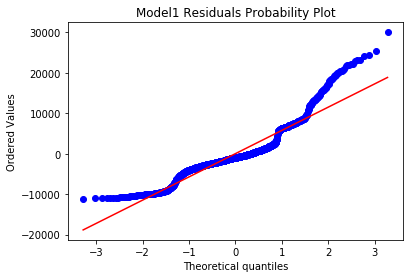

In [161]:
stats.probplot(model.resid, plot= plt)
plt.title("Model1 Residuals Probability Plot")

This plot indicates that the model’s residuals are not normally distributed. 

Common formal tests include the chi-square test, Kolmogorov-Smirnov test, and the Lilliefors test. I will demonstrate how to test for normality using the Kolmogorov-Smirnov test.

In [162]:
stats.kstest(model.resid, 'norm')

KstestResult(statistic=0.6263077931301486, pvalue=0.0)

The test is significant which indicates that the model’s residuals are not normally distributed.

## Diagnosing Homoscedasticity

The assumption of homoscedasticity is a vital assumption for linear regression. If this assumption is violated, then the standard errors will be biased. The standard errors are used to conduct significance tests, and calculate the confidence intervals.

This can be tested using a few different statistical tests, these include the
Brown-Forsythe test, Levene’s test, Bruesch-Pagan test, or Cook-Weisberg test. In this example, I will demonstrate how to conduct the Bruesch-Pagan test followed by how to conduct the Levene’s test. The test for homoscedasticity of variance needs to be conducted for each level of the categorical variables.

In [163]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']

test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 121.74360137569016),
 ('p-value', 1.4467175539179645e-22),
 ('f-value', 16.62861202737544),
 ('f p-value', 1.1456058246338429e-23)]

Since I know residuals are not normally distributed, I will conduct the Levene’s test using the median instead of the mean.

In [164]:
sex_variance_results = stats.levene(df['charges'][df['sex'] == 0], 
                                    df['charges'][df['sex'] == 1], center= 'median')

smoker_variance_results = stats.levene(df['charges'][df['smoker'] == 0],
                                       df['charges'][df['smoker'] == 1], center= 'median')

region_variance_results = stats.levene(df['charges'][df['region_northeast'] == 1],
                                       df['charges'][df['region_northwest'] == 1],
                                       df['charges'][df['region_southeast'] == 1],
                                       df['charges'][df['region_southwest'] == 1], center= 'median')

print(f"Sex Variance: {sex_variance_results}", "\n",
      f"Smoker Variance: {smoker_variance_results}", "\n",
      f"Region Variance: {region_variance_results}", "\n")

Sex Variance: LeveneResult(statistic=9.90925122305512, pvalue=0.0016808765833903443) 
 Smoker Variance: LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66) 
 Region Variance: LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703) 



Both of the tests are significant meaning the data violates the assumption of homoscedasticity, i.e. heteroscedasticity is present in the data. What to do? Either one can transform the variables to improve the model, or use a robust regression method that accounts for the heteroscedasticity.

In order to account for the heteroscedasticity in the data, one has to select a heteroscedasticity consistent covariance matrix (HCCM) and pass it in the “cov_type=” argument apart of the .fit() method. What is HCCM? Here is a nice read if interested more on this http://www.indiana.edu/~jslsoc/files_research/testing_tests/hccm/00TAS.pdf. There are a few HCCMs to choose from:

- HC0, not good on sample size ? 250
- HC1, not good on sample size ? 250
- HC2, good on sample size ? 250
- HC3, which out performs HC0, HC1, and HC2 when sample size ? 250
- Little difference in performance when sample is ? 500

For the current model, using a robust regression technique will work. This will be demonstrated in the re-running of the model.

## Model Re-run

The re-run of the model will use a heteroscedasticity consistent covariance matrix so the model is protected from the violation of homogeneity of variance, the model however is not correcting the violation of normality.

In [165]:
model3 = smf.ols("charges ~ age + bmi + sex + smoker + children + region_northwest + region_southeast + region_southwest", data= df).fit(cov_type='HC3')
    
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     298.4
Date:                Wed, 15 May 2019   Prob (F-statistic):          2.25e-290
Time:                        18:27:03   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:                  HC3                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.207e+04   1062.898    -11.356      0.000   -1.42e+04   -9986.611
age                256.8564     11.961     21.474      0.000     233.412     280.300
bmi                339.1935     31.879     10.640      0.000     276.711     401.676
sex                131.3144    334.971      0.392      0.695    -525.217     787.846
smoker            2.385e+04    578.079     41.255      0.000    2.27e+04     2.5e+04
children           475.5005    131.009      3.630      0.000     218.727     732.274
region_northwest  -352.9639    486.616     -0.725      0.468   -1306.714     600.786
region_southeast -1035.0220    503.426     -2.056      0.040   -2021.718     -48.326
region_southwest  -960.0510    463.014     -2.073      0.038   -1867.541     -52.561
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         315.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

## Linear Regression Interpretation

First one has to look to see if the model is significant. This information is found in “Prov (F-statistic)= 2.25e-290 “, the current model is significant. 

Now one can look at the affects of each IV on the DV (the IV coefficients) and see if it is a significant predictor or not (P>|z|). As usual, one wants a p-value < 0.05. All the IVs are significant predictors of insurance premium charges except for sex. Indicating that sex doesn't matter in this context. 

The coefficient (coef) can be interpreted as the affect in unit change in terms of the DV. Meaning, for every 1 unit increase in the IV, the DV will increase or decrease by the coefficient amount. In the example above, for every year increase in age, there will be a $256.86 increase in the insurance premium charge. Let's review the linear regression equation to see how this data makes as a predictive/explanatory model. It is predictive when used to predict future outcomes, and explanatory when used to explain the influence of each IV. Y = ?0 + ?1X1 + ?2X2 + ?nXn + ei

Where:

- Y = outcome variable (dependent variable)
- ?0 = constant coefficient (Y-intercept)
- ?1X1 = is the coefficient and known constant for variable 1, respectively
- ?2X2 = is the coefficient and known constant for variable 2, respectively
- ?nXn = is the coefficient and known constant for variable n, respectively
- ei = error

Using the current model, one can write the formula as:
Charges = -12,070 + 256.86(age) + 339.19(bmi) + 131.31(sex_female) + 23,850(smoker_yes) + 474.50(number of children) - 352.96(region_northwest) - 1,035.02(region_southeast) - 960.05(region_soughtwest)

Now to write up the model’s performance.

MODEL WRITE UP
Multiple regression analysis was used to test if age, BMI, sex (female), smoking status, number of children, and region significantly predicted the cost of insurance premiums. The results of the regression indicated the nine predictors explained 75.1% of the variance (R2= 0.75, F(8,1329)= 298.4, p< 0.01). The predicted insurance premium charge is equal to -12,070 + 256.86(age) + 339.19(bmi) + 131.31(sex) + 23,850(smoker) + 474.50(number of children) - 352.96(region_northwest) - 1,035.02(region_southeast) - 960.05(region_soughtwest), where sex is coded as 1= female, 0= male; smoker is coded as 1= smoker, 0= non-smoker; region_[location] is coded as 1= in region, 0= not in region. All of the independent variables used in the model were significant predictors of insurance premium charge, except for sex

# Logistic Regression 

Logistic regression models are used to analyze the relationship between a dependent variable (DV) and independent variable(s) (IV) when the DV is dichotomous. The DV is the outcome variable, a.k.a. the predicted variable, and the IV(s) are the variables that are believed to have an influence on the outcome, a.k.a. predictor variables. If the model contains 1 IV, then it is a simple logistic regression model, and if the model contains 2+ IVs, then it is a multiple logistic regression model.

## Assumptions for logistic regression models:

- The DV is categorical (binary)
- If there are more than 2 categories in terms of types of outcome, a multinomial logistic regression should be used
- Independence of observations
- Cannot be a repeated measures design, i.e. collecting outcomes at two different time points.
- Independent variables are linearly related to the log odds
- Absence of multicollinearity
- Lack of outliers

Datasets: 

The question being asked is, how does GRE score, GPA, and prestige of the undergraduate institution effect admission into graduate school. The DV is admission status (binary), and the IVs are: GRE score, GPA, and undergraduate prestige

In [187]:
## Loading data directly from UCLA
df = pd.read_csv(folder+'binary.csv')

df2 = pd.read_csv(folder+'admission.csv')


In [181]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [185]:
## Converting variable to categorical data type (since that what it is)
## and then creating dummy variables
df['rank'] = df['rank'].astype('category')

df = pd.get_dummies(df)

## Multiple Logistic Regression Example

First the assumptions of the model need to be checked- the first 2 assumptions are met. Let’s import the library needed to run the logistic regression, a graphing library, and then check the rest of the assumptions.

- ASSUMPTION OF CONTINUOUS IVS BEING LINEARLY RELATED TO THE LOG ODDS

Logistic regression does not require the continuous IV(s) to be linearly related to the DV. It does require the continuous IV(s) be linearly related to the log odds of the IV though. A way to test this is to plot the IV(s) in question and look for an S-shaped curve. Sometimes the S-shape will not be obvious. The plot should have a flat or flat-ish top and bottom with an increase or decreasing middle.

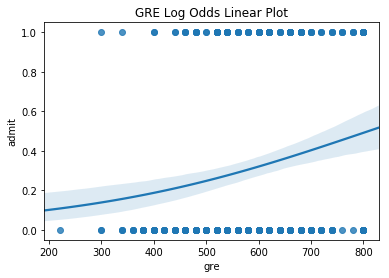

In [176]:
# Needed to run the logistic regression
import statsmodels.formula.api as smf

gre = sns.regplot(x= 'gre', y= 'admit', data= df, logistic= True).set_title("GRE Log Odds Linear Plot")


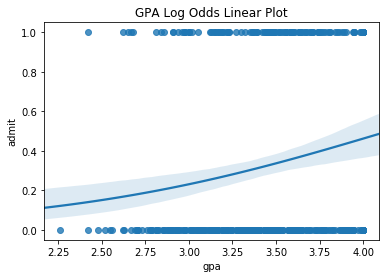

In [177]:
gpa = sns.regplot(x= 'gpa', y= 'admit', data= df, logistic= True).set_title("GPA Log Odds Linear Plot")


It may be hard to see, but the data does have somewhat of a curve occurring that resembles the S-shaped curve that is required. If a non-S-shaped line were to be present, sometimes a U-shape will be present, how to handle that data needs to be considered.

- ASSUMPTION OF ABSENCE OF MULTICOLLINEARITY

An easy way to test this is to use a correlation matrix, and look for any highly correlated variables, and/or to look at for high Variance Inflation Factor (VIF) scores. If there are variables that are highly correlated, or have a high VIF, a corrective action would be to drop one of them since they are measuring the same/similar thing.


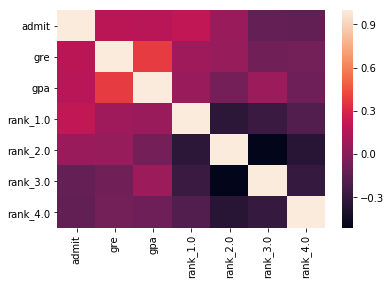

In [178]:
sns.heatmap(df.corr())

The only independent variables that have a moderate correlation with each other are rank_2.0 and rank_3.0. Given that these variables are dummy codes from the original variable “rank”, there is no concern with there being multicollinearity.

- ASSUMPTION OF LACK OF OUTLIERS

The assumption of lack of outliers is an easy one to check. One can get a feel of this with the descriptive statistics provided by the .describe() method. The easiest way to check for outliers is to use a box plot.

Do to there being a drastic difference between the values used to measure GRE and the GPA/ Rank, two separate box plot charts will be produced.

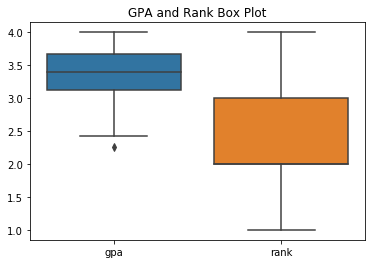

In [182]:
gpa_rank_box = sns.boxplot(data= df[['gpa', 'rank']]).set_title("GPA and Rank Box Plot")

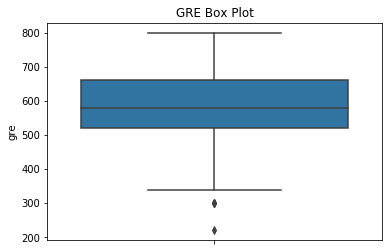

In [184]:
gre_box = sns.boxplot(x= 'gre', data= df, orient= 'v').set_title("GRE Box Plot")

There looks to be 2 values that could be considered outliers for the GRE variable, and 1 value for GPA variable. In both of these cases, the values that are in question are not so far away from the rest of the values in their respective variable. Thus, the values can be kept and used in the analysis.

## LOGISTIC REGRESSION MODEL

From here, it’s straightforward of plugging the desired model into the formula. For the “Rank” variable, one can either use the dummy variables created to look at multicollinearity or by using the “C(variable_of_interest)”. If using the dummy variables, be sure to not include 1 of the groups to avoid the Dummy Variable Trap. The group dropped is then considered the reference group for the other dummy variables that came from the same original variable. Most commonly, the highest ranked group is dropped, or sometimes the lowest ranked group is dropped – it all depends on the hypothesis. Using the “C(variable_of_interest)” method automatically does this.

In [188]:
model= smf.logit(formula="admit~ gre + gpa + C(rank)", data= df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Wed, 15 May 2019   Pseudo R-squ.:                 0.08292
Time:                        21:12:56   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.9900      1.140     -3.500      0.000      -6.224      -1.756
C(rank)[T.2.0]    -0.6754      0.316     -2.134      0.033      -1.296      -0.055
C(rank)[T.3.0]    -1.3402      0.345     -3.881      0.000      -2.017      -0.663
C(rank)[T.4.0]    -1.5515      0.418     -3.713      0.000      -2.370      -0.733
gre                0.0023      0.001      2.070      0.038       0.000       0.004
gpa                0.8040      0.332      2.423      0.015       0.154       1.454
==================================================================================
"""

## Interpreting Logistic Regression

The model summary shows the coefficients, standard error, the associated z-score, and the 95% confidence intervals. We interpret the results as follows, the overall model is significant indicated by a LLR p-value < 0.05 (7.578e-08) which allows us to look at the rest of the results. All the IVs have a significant effect on the log odds of being admitted as indicated by the z values < 0.05.

### Numeric Variables
Interpreting continuous variables is not very different from interpreting them in a linear regression model. For every one unit increase in gre score, the log odds of admission increase by 0.0023; for every one unit increase in gpa, the log odds of admission increase by 0.8040.

### Categorical Variables
The categorical variables have a different interpretation. Since Rank 1 was dropped from the analysis, it is the comparison group and plays an important role in interpreting the other categories. For example, if an applicant attended a Rank 2 University compared to a Rank 1 University, there is a -0.6754 decrease in the log odds of admission; if an applicant attended a Rank 3 University compared to a Rank 1 University, there is a -1.3402 decrease in the log odds of admission.


## Taking Logistic Regression a Step Further
Interpreting the log odds is not very straight forward when thinking about it’s effects. An easier way to interpret the findings is by converting the coefficients of the logistic regression model into odd ratios. This can be done by getting the exponent of the coefficient value.

In [189]:
# GETTING THE ODDS RATIOS, Z-VALUE, AND 95% CI
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['z-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())
model_odds

,OR,z-value,2.5%,97.5%
Intercept,0.018500,0.000465,0.001981,0.172783
C(rank)[T.2.0],0.508931,0.032829,0.273692,0.946358
C(rank)[T.3.0],0.261792,0.000104,0.133055,0.515089
C(rank)[T.4.0],0.211938,0.000205,0.093443,0.480692
gre,1.002267,0.038465,1.000120,1.004418
gpa,2.234545,0.015388,1.166122,4.281877


 Converting the logistic coefficients into odds ratios makes it easier to interpret the effects on the DV. The confidence intervals have been converted to odds as well.
 
## Numeric Variables
For every one unit increase in gpa, the odds of being admitted increases by a factor of 2.235; for every one unit increase in gre score, the odds of being admitted increases by a factor of 1.002.

## Categorical Variables
Still interpreting the results in comparison to the group that was dropped. Applicants from a Rank 2 University compared to a Rank 1 University are 0.509 as likely to be admitted; applicants from a Rank 3 University compared to a Rank 1 University are 0.262 as likely to be admitted, etc.

An even easier way to say the above would be, applicants from a Rank 2 University are about half as likely to be admitted compared to applicants from a Rank 1 University, and applicants from a Rank 3 University are about a quarter as likely to be admitted compared to applicants from a Rank 1 University.

When interpreting odd ratios, any value greater than 1 indicates an increase in the odds, i.e. an increase in the likely hood, of that group being in the outcome variable, and any value less than 1 indicates a decrease in the odds, i.e. an decrease in the likely hood.